# Data Analysis and Machine Learning for Laptops Pricing


### Importing Required Libraries

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
filepath = 'LaptopPricing-Dataset-3.csv'
df = pd.read_csv(filepath)

Print the value of df.head(). 


In [3]:
print(df.shape)
df.head()

(238, 16)


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [5]:

y_data=df['Price']
x_data=df.drop('Price',axis=1)

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [6]:
 
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=1)
print("Number of train sample : ",x_train.shape[0])
print("Number of test sample : ",x_test.shape[0])

Number of train sample :  214
Number of test sample :  24


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [7]:

lm=LinearRegression()
lm.fit(x_train[['CPU_frequency']],y_train)
print(lm.score(x_test[['CPU_frequency']],y_test))
print(lm.score(x_train[['CPU_frequency']],y_train))

-0.06599437350393789
0.14829792099817973


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [8]:
 
scores=cross_val_score(lm,x_data[['CPU_frequency']],y_data,cv=4)
print("The mean of the folds are ",scores.mean()," the standard deviation is ",scores.std())


The mean of the folds are  -0.16109232388595113  the standard deviation is  0.384957978666471


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [9]:

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.5,random_state=1)
print("Number of test sample : ",x_test.shape)
print("Number of train sample : ",x_train.shape)

Number of test sample :  (119, 13)
Number of train sample :  (119, 13)


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


In [10]:

lre=LinearRegression()
Rscore=[]
order=[1,2,3,4,5]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr=pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr,y_train)
    Rscore.append(lre.score(x_test_pr,y_train))

Plot the values of R^2 scores against the order. Note the point where the score drops.


Text(0.5, 1.0, 'R^2 Using Test Data')

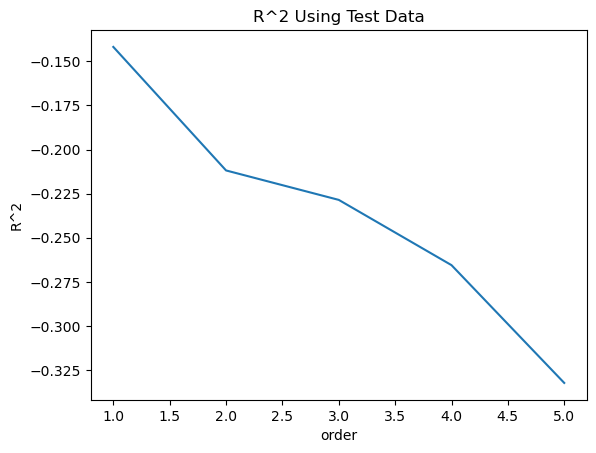

In [11]:

plt.plot(order,Rscore)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [12]:

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [13]:

Rsqu_test=[]
Rsqu_train=[]
Alpha=np.arange(0.001,1,0.001)
pbar=tqdm(Alpha)
for alpha in pbar:
    RidgeModel=Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr,y_train)
    test_score,train_score=RidgeModel.score(x_test_pr,y_test),RidgeModel.score(x_train_pr,y_train)
    pbar.set_postfix({"Test Score":test_score,"Train Score":train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:09<00:00, 105.88it/s, Test Score=0.507, Train Score=0.642]


Plot the R^2 values for training and testing sets with respect to the value of alpha


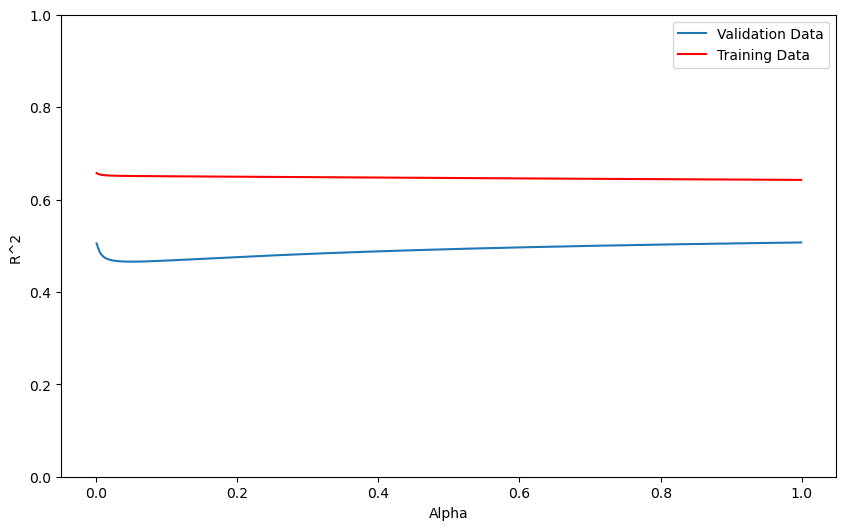

In [14]:

width=10
height=6
plt.figure(figsize=(width,height))
plt.plot(Alpha,Rsqu_test,label='Validation Data')
plt.plot(Alpha,Rsqu_train,'r',label='Training Data')
plt.xlabel('Alpha')
plt.ylabel('R^2 ')
plt.ylim(0,1)
plt.legend()

# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [15]:

parameters= [{'alpha':[0.0001,0.001,0.01,0.1,1,10]}]


Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [16]:

RR=Ridge()
Grid1=GridSearchCV(RR,parameters,cv=4)
Grid1.fit(x_train[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']],y_train)



GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [17]:

BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']],y_test))


0.42296349452687465
